In [34]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
sim1 = rebound.Simulation()

m1 = 10
m2 = 1
m3 = 1/1000
m = m1 + m2
M = m + m3
eta = m1*m2/m**2
eta3 = m*m3/M**2

inner_a = 1
inner_e = 0.25
inner_w = 0*np.pi/180
inner_Omega = 0
inner_f = 180

outer_A = 10
outer_E = 0.6
outer_w3 = 0*np.pi/180
outer_Omega3 = np.pi
outer_f = 0

z = 65*np.pi/180 

Jb = m*eta*(m*inner_a*(1-inner_e**2))**0.5
J3 = M*eta3*(M*outer_A*(1-outer_E**2))**0.5
beta = Jb/J3
outer_i3 = np.arctan(((beta**-1 + np.cos(z))/np.sin(z))**-1)

inner_i =  np.arctan(((beta + np.cos(z))/np.sin(z))**-1) 

sim1.add(m=m1)                
sim1.add(m=m2, a=inner_a, e=inner_e, inc=inner_i,  omega=inner_w,
         Omega=inner_Omega,f = inner_f*np.pi/180)
sim1.add(m=m3, a=outer_A, e=outer_E, inc=outer_i3, omega=outer_w3,
         Omega=outer_Omega3,f = outer_f*np.pi/180)
sim1.move_to_com()
print((inner_i+outer_i3)*180/np.pi)
Pratio=sim1.particles[2].P/sim1.particles[1].P
print(Pratio)
print(np.sin(outer_i3)/np.sin(inner_i))
print(beta)

64.99999999999999
31.621339300744367
347.954698962455
347.95469896245504


C:\Users\lande\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


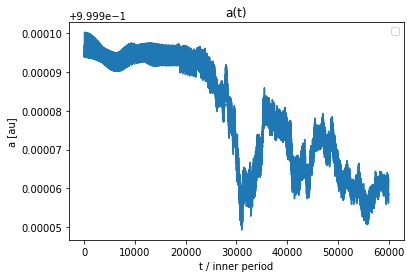

No handles with labels found to put in legend.


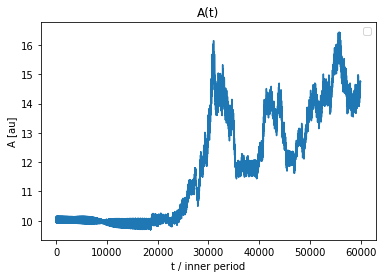

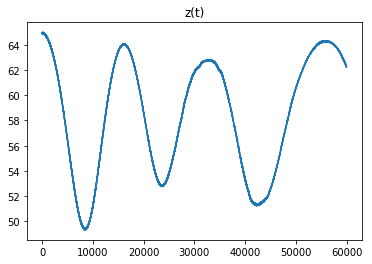

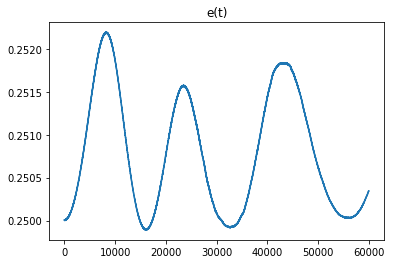

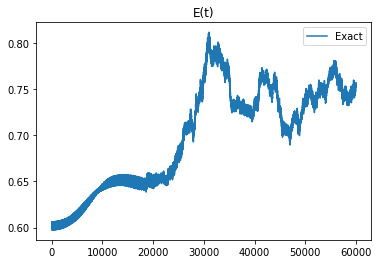

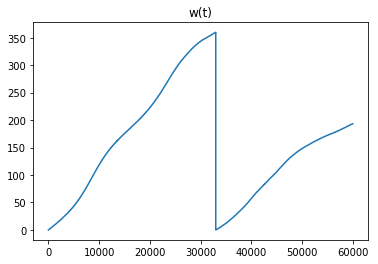

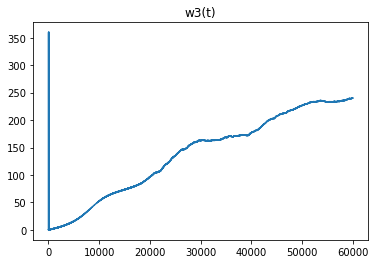

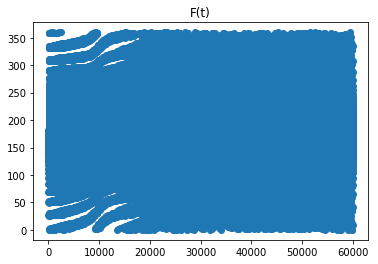

In [35]:
innerP = sim1.particles[1].P
pointsperorbit = 2
tf = 60000*sim1.particles[1].P
t = np.linspace(0,tf,pointsperorbit*tf/sim1.particles[1].P)
ifcn1 = []
i3fcn1 =[]
efcn1 =[]
Efcn1 = []
wfcn1 = []
w3fcn1 = []
afcn1 = []
Afcn1 = []
Omegafcn1 = []
Omega3fcn1 = []
Flist = []
tlist = []
counter = 0
for j in t:
    if (0)*np.pi/180 < sim1.particles[2].f and sim1.particles[2].f < (360)*np.pi/180:
        efcn1.append(sim1.particles[1].e)
        Efcn1.append(sim1.particles[2].e)
        ifcn1.append(sim1.particles[1].inc)
        i3fcn1.append(sim1.particles[2].inc)
        wfcn1.append(sim1.particles[1].omega)
        w3fcn1.append(sim1.particles[2].omega)
        afcn1.append(sim1.particles[1].a)
        Afcn1.append(sim1.particles[2].a)
        Omegafcn1.append(sim1.particles[1].Omega)
        Omega3fcn1.append(sim1.particles[2].Omega)
        Flist.append(sim1.particles[2].f)
        tlist.append(sim1.t)
    if (260)*np.pi/180 < sim1.particles[2].f and sim1.particles[2].f < (260)*np.pi/180:
        efcn1.append(sim1.particles[1].e)
        Efcn1.append(sim1.particles[2].e)
        ifcn1.append(sim1.particles[1].inc)
        i3fcn1.append(sim1.particles[2].inc)
        wfcn1.append(sim1.particles[1].omega)
        w3fcn1.append(sim1.particles[2].omega)
        afcn1.append(sim1.particles[1].a)
        Afcn1.append(sim1.particles[2].a)
        Omegafcn1.append(sim1.particles[1].Omega)
        Omega3fcn1.append(sim1.particles[2].Omega)
        Flist.append(sim1.particles[2].f)
        tlist.append(sim1.t)
    sim1.integrate(j)

    counter += 1
afcn1=np.array(afcn1)
efcn1=np.array(efcn1)
wfcn1=np.array(wfcn1)
ifcn1=np.array(ifcn1)
Afcn1=np.array(Afcn1)
Efcn1=np.array(Efcn1)
w3fcn1=np.array(w3fcn1)
i3fcn1=np.array(i3fcn1)
tlist=np.array(tlist)

plt.plot(np.array(tlist)/innerP,afcn1)
plt.title("a(t)")
plt.xlabel('t / inner period')
plt.legend()
plt.ylabel('a [au]')
plt.show()

plt.plot(np.array(tlist)/innerP,Afcn1)
plt.title("A(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('A [au]')
plt.show()

plt.plot(np.array(tlist)/innerP,(ifcn1+i3fcn1)*180/np.pi)
plt.title("z(t)")
plt.show()

plt.plot(np.array(tlist)/innerP,efcn1)
plt.title("e(t)")
plt.show()

plt.plot(np.array(tlist)/innerP,Efcn1,label="Exact")
plt.title("E(t)")
plt.legend()
plt.show()

plt.plot(np.array(tlist)/innerP,(wfcn1)*180/np.pi)
plt.title("w(t)")
plt.show()

plt.plot(np.array(tlist)/innerP,(w3fcn1)*180/np.pi)
plt.title("w3(t)")
plt.show()

plt.scatter(np.array(tlist)/innerP,(np.array(Flist))*180/np.pi)
plt.title("F(t)")
plt.show()


In [40]:
zfcn1=(ifcn1+i3fcn1)*180/np.pi
tlistmat=tlist/innerP
N = int(2*pointsperorbit*Pratio)
aved_A = np.convolve(Afcn1,np.ones(N)/N,mode='valid')
aved_a = np.convolve(afcn1,np.ones(N)/N,mode='valid')
Afcn1.astype('float32').tofile('npA.dat')
afcn1.astype('float32').tofile('npaa.dat')
aved_A.astype('float32').tofile('npavA.dat')
aved_a.astype('float32').tofile('npavaa.dat')
efcn1.astype('float32').tofile('npe.dat')
Efcn1.astype('float32').tofile('npEE.dat')
zfcn1.astype('float32').tofile('npz.dat')
wfcn1.astype('float32').tofile('npw.dat')
w3fcn1.astype('float32').tofile('npw3.dat')
tlistmat.astype('float32').tofile('npt.dat')
avtlistmat=tlist[:len(aved_a)]/innerP
avtlistmat.astype('float32').tofile('npavt.dat')

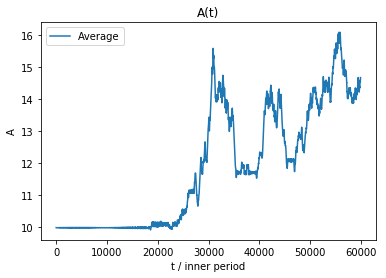

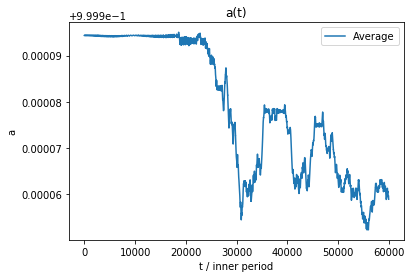

In [39]:
tlistmat=tlist/innerP
N = int(2*pointsperorbit*Pratio)
aved_a = np.convolve(afcn1,np.ones(N)/N,mode='valid')
aved_A = np.convolve(Afcn1,np.ones(N)/N,mode='valid')
plt.plot(tlist[:len(aved_A)]/innerP,aved_A,label="Average")
plt.title("A(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('A')
plt.show()

plt.plot(tlist[:len(aved_a)]/innerP,aved_a,label="Average")
plt.title("a(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('a')
plt.show()

In [41]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
sim1 = rebound.Simulation()

m1 = 10
m2 = 1
m3 = 1/1000
m = m1 + m2
M = m + m3
eta = m1*m2/m**2
eta3 = m*m3/M**2

inner_a = 1
inner_e = 0.25
inner_w = 0*np.pi/180
inner_Omega = 0
inner_f = 0

outer_A = 10
outer_E = 0.6
outer_w3 = 0*np.pi/180
outer_Omega3 = np.pi
outer_f = 0

z = 65*np.pi/180 

Jb = m*eta*(m*inner_a*(1-inner_e**2))**0.5
J3 = M*eta3*(M*outer_A*(1-outer_E**2))**0.5
beta = Jb/J3
outer_i3 = np.arctan(((beta**-1 + np.cos(z))/np.sin(z))**-1)

inner_i =  np.arctan(((beta + np.cos(z))/np.sin(z))**-1) 

sim1.add(m=m1)                
sim1.add(m=m2, a=inner_a, e=inner_e, inc=inner_i,  omega=inner_w,
         Omega=inner_Omega,f = inner_f*np.pi/180)
sim1.add(m=m3, a=outer_A, e=outer_E, inc=outer_i3, omega=outer_w3,
         Omega=outer_Omega3,f = outer_f*np.pi/180)
sim1.move_to_com()
print((inner_i+outer_i3)*180/np.pi)
Pratio=sim1.particles[2].P/sim1.particles[1].P
print(Pratio)
print(np.sin(outer_i3)/np.sin(inner_i))
print(beta)

64.99999999999999
31.62133930074438
347.954698962455
347.95469896245504


C:\Users\lande\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


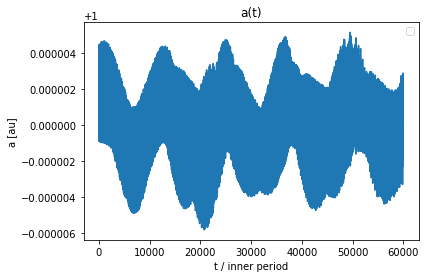

No handles with labels found to put in legend.


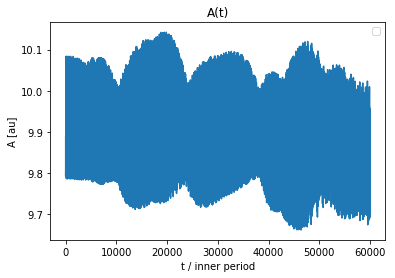

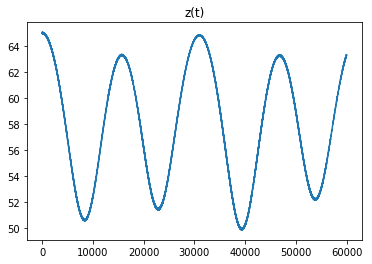

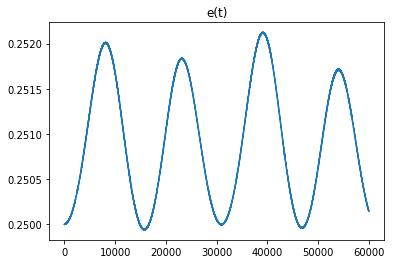

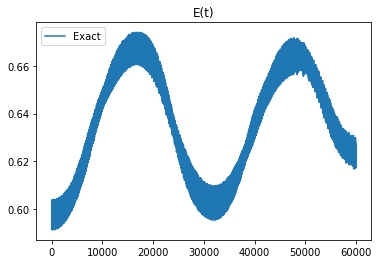

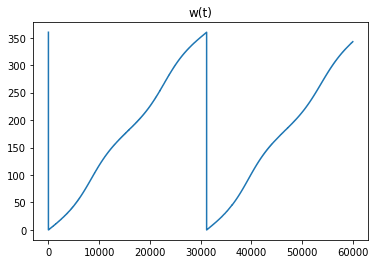

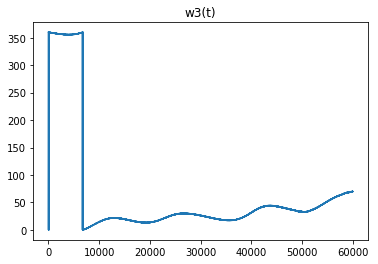

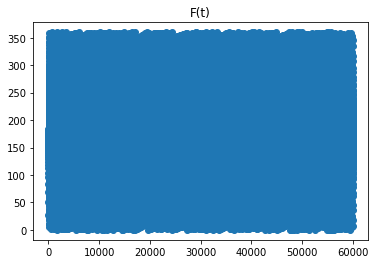

In [42]:
innerP = sim1.particles[1].P
pointsperorbit = 2
tf = 60000*sim1.particles[1].P
t = np.linspace(0,tf,pointsperorbit*tf/sim1.particles[1].P)
ifcn1 = []
i3fcn1 =[]
efcn1 =[]
Efcn1 = []
wfcn1 = []
w3fcn1 = []
afcn1 = []
Afcn1 = []
Omegafcn1 = []
Omega3fcn1 = []
Flist = []
tlist = []
counter = 0
for j in t:
    if (0)*np.pi/180 < sim1.particles[2].f and sim1.particles[2].f < (360)*np.pi/180:
        efcn1.append(sim1.particles[1].e)
        Efcn1.append(sim1.particles[2].e)
        ifcn1.append(sim1.particles[1].inc)
        i3fcn1.append(sim1.particles[2].inc)
        wfcn1.append(sim1.particles[1].omega)
        w3fcn1.append(sim1.particles[2].omega)
        afcn1.append(sim1.particles[1].a)
        Afcn1.append(sim1.particles[2].a)
        Omegafcn1.append(sim1.particles[1].Omega)
        Omega3fcn1.append(sim1.particles[2].Omega)
        Flist.append(sim1.particles[2].f)
        tlist.append(sim1.t)
    if (260)*np.pi/180 < sim1.particles[2].f and sim1.particles[2].f < (260)*np.pi/180:
        efcn1.append(sim1.particles[1].e)
        Efcn1.append(sim1.particles[2].e)
        ifcn1.append(sim1.particles[1].inc)
        i3fcn1.append(sim1.particles[2].inc)
        wfcn1.append(sim1.particles[1].omega)
        w3fcn1.append(sim1.particles[2].omega)
        afcn1.append(sim1.particles[1].a)
        Afcn1.append(sim1.particles[2].a)
        Omegafcn1.append(sim1.particles[1].Omega)
        Omega3fcn1.append(sim1.particles[2].Omega)
        Flist.append(sim1.particles[2].f)
        tlist.append(sim1.t)
    sim1.integrate(j)

    counter += 1
afcn1=np.array(afcn1)
efcn1=np.array(efcn1)
wfcn1=np.array(wfcn1)
ifcn1=np.array(ifcn1)
Afcn1=np.array(Afcn1)
Efcn1=np.array(Efcn1)
w3fcn1=np.array(w3fcn1)
i3fcn1=np.array(i3fcn1)
tlist=np.array(tlist)

plt.plot(np.array(tlist)/innerP,afcn1)
plt.title("a(t)")
plt.xlabel('t / inner period')
plt.legend()
plt.ylabel('a [au]')
plt.show()

plt.plot(np.array(tlist)/innerP,Afcn1)
plt.title("A(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('A [au]')
plt.show()

plt.plot(np.array(tlist)/innerP,(ifcn1+i3fcn1)*180/np.pi)
plt.title("z(t)")
plt.show()

plt.plot(np.array(tlist)/innerP,efcn1)
plt.title("e(t)")
plt.show()

plt.plot(np.array(tlist)/innerP,Efcn1,label="Exact")
plt.title("E(t)")
plt.legend()
plt.show()

plt.plot(np.array(tlist)/innerP,(wfcn1)*180/np.pi)
plt.title("w(t)")
plt.show()

plt.plot(np.array(tlist)/innerP,(w3fcn1)*180/np.pi)
plt.title("w3(t)")
plt.show()

plt.scatter(np.array(tlist)/innerP,(np.array(Flist))*180/np.pi)
plt.title("F(t)")
plt.show()


In [44]:
zfcn1=(ifcn1+i3fcn1)*180/np.pi
tlistmat=tlist/innerP
N = int(2*pointsperorbit*Pratio)
aved_a = np.convolve(afcn1,np.ones(N)/N,mode='valid')
aved_A = np.convolve(Afcn1,np.ones(N)/N,mode='valid')
Afcn1.astype('float32').tofile('npA.dat')
afcn1.astype('float32').tofile('npaa.dat')
aved_A.astype('float32').tofile('npavA.dat')
aved_a.astype('float32').tofile('npavaa.dat')
efcn1.astype('float32').tofile('npe.dat')
Efcn1.astype('float32').tofile('npEE.dat')
zfcn1.astype('float32').tofile('npz.dat')
wfcn1.astype('float32').tofile('npw.dat')
w3fcn1.astype('float32').tofile('npw3.dat')
tlistmat.astype('float32').tofile('npt.dat')
avtlistmat=tlist[:len(aved_a)]/innerP
avtlistmat.astype('float32').tofile('npavt.dat')

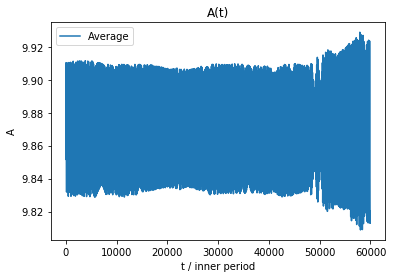

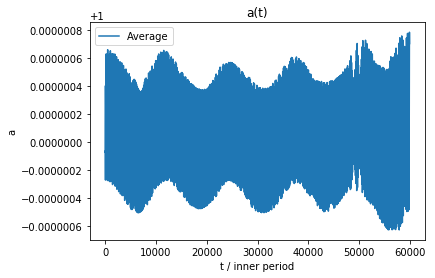

In [43]:
tlistmat=tlist/innerP
N = int(2*pointsperorbit*Pratio)
aved_a = np.convolve(afcn1,np.ones(N)/N,mode='valid')
aved_A = np.convolve(Afcn1,np.ones(N)/N,mode='valid')
plt.plot(tlist[:len(aved_A)]/innerP,aved_A,label="Average")
plt.title("A(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('A')
plt.show()

plt.plot(tlist[:len(aved_a)]/innerP,aved_a,label="Average")
plt.title("a(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('a')
plt.show()

In [84]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
sim1 = rebound.Simulation()

m1 = 10
m2 = 1
m3 = 1/1000
m = m1 + m2
M = m + m3
eta = m1*m2/m**2
eta3 = m*m3/M**2

inner_a = 1
inner_e = 0.25
inner_w = 0*np.pi/180
inner_Omega = 0
inner_f = 0

outer_A = 10
outer_E = 0.6
outer_w3 = 0*np.pi/180
outer_Omega3 = np.pi
outer_f = 0

z = 65*np.pi/180 

Jb = m*eta*(m*inner_a*(1-inner_e**2))**0.5
J3 = M*eta3*(M*outer_A*(1-outer_E**2))**0.5
beta = Jb/J3
outer_i3 = np.arctan(((beta**-1 + np.cos(z))/np.sin(z))**-1)

inner_i =  np.arctan(((beta + np.cos(z))/np.sin(z))**-1) 

sim1.add(m=m1)                
sim1.add(m=m2, a=inner_a, e=inner_e, inc=inner_i,  omega=inner_w,
         Omega=inner_Omega,f = inner_f*np.pi/180)
sim1.add(m=m3, a=outer_A, e=outer_E, inc=outer_i3, omega=outer_w3,
         Omega=outer_Omega3,f = outer_f*np.pi/180)
sim1.move_to_com()
print((inner_i+outer_i3)*180/np.pi)
Pratio=sim1.particles[2].P/sim1.particles[1].P
print(Pratio)
print(np.sin(outer_i3)/np.sin(inner_i))
print(beta)

64.99999999999999
31.62133930074438
347.954698962455
347.95469896245504


C:\Users\lande\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


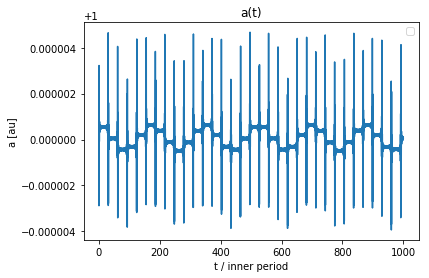

No handles with labels found to put in legend.


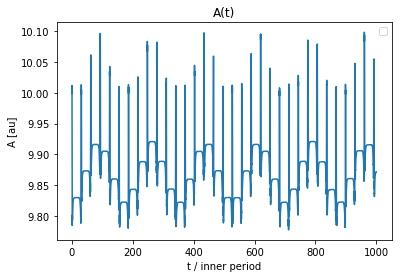

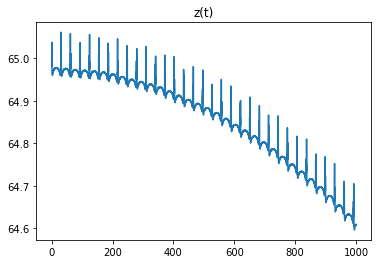

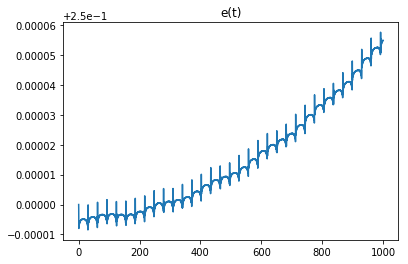

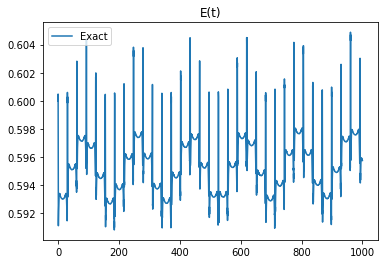

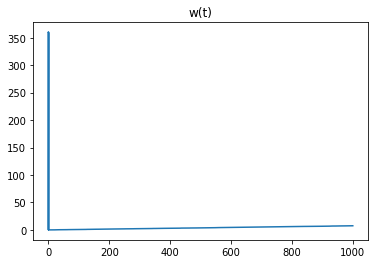

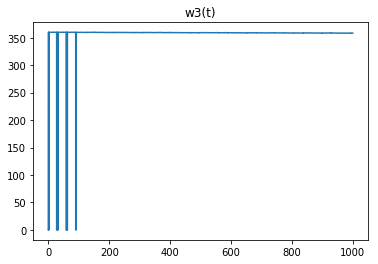

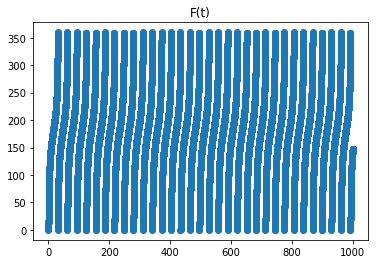

In [85]:
innerP = sim1.particles[1].P
pointsperorbit = 100
tf = 1000*sim1.particles[1].P
t = np.linspace(0,tf,pointsperorbit*tf/sim1.particles[1].P)
ifcn1 = []
i3fcn1 =[]
efcn1 =[]
Efcn1 = []
wfcn1 = []
w3fcn1 = []
afcn1 = []
Afcn1 = []
Omegafcn1 = []
Omega3fcn1 = []
Flist = []
tlist = []
counter = 0
for j in t:
    if (0)*np.pi/180 < sim1.particles[2].f and sim1.particles[2].f < (360)*np.pi/180:
        efcn1.append(sim1.particles[1].e)
        Efcn1.append(sim1.particles[2].e)
        ifcn1.append(sim1.particles[1].inc)
        i3fcn1.append(sim1.particles[2].inc)
        wfcn1.append(sim1.particles[1].omega)
        w3fcn1.append(sim1.particles[2].omega)
        afcn1.append(sim1.particles[1].a)
        Afcn1.append(sim1.particles[2].a)
        Omegafcn1.append(sim1.particles[1].Omega)
        Omega3fcn1.append(sim1.particles[2].Omega)
        Flist.append(sim1.particles[2].f)
        tlist.append(sim1.t)
    if (260)*np.pi/180 < sim1.particles[2].f and sim1.particles[2].f < (260)*np.pi/180:
        efcn1.append(sim1.particles[1].e)
        Efcn1.append(sim1.particles[2].e)
        ifcn1.append(sim1.particles[1].inc)
        i3fcn1.append(sim1.particles[2].inc)
        wfcn1.append(sim1.particles[1].omega)
        w3fcn1.append(sim1.particles[2].omega)
        afcn1.append(sim1.particles[1].a)
        Afcn1.append(sim1.particles[2].a)
        Omegafcn1.append(sim1.particles[1].Omega)
        Omega3fcn1.append(sim1.particles[2].Omega)
        Flist.append(sim1.particles[2].f)
        tlist.append(sim1.t)
    sim1.integrate(j)

    counter += 1
afcn1=np.array(afcn1)
efcn1=np.array(efcn1)
wfcn1=np.array(wfcn1)
ifcn1=np.array(ifcn1)
Afcn1=np.array(Afcn1)
Efcn1=np.array(Efcn1)
w3fcn1=np.array(w3fcn1)
i3fcn1=np.array(i3fcn1)
tlist=np.array(tlist)

plt.plot(np.array(tlist)/innerP,afcn1)
plt.title("a(t)")
plt.xlabel('t / inner period')
plt.legend()
plt.ylabel('a [au]')
plt.show()

plt.plot(np.array(tlist)/innerP,Afcn1)
plt.title("A(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('A [au]')
plt.show()

plt.plot(np.array(tlist)/innerP,(ifcn1+i3fcn1)*180/np.pi)
plt.title("z(t)")
plt.show()

plt.plot(np.array(tlist)/innerP,efcn1)
plt.title("e(t)")
plt.show()

plt.plot(np.array(tlist)/innerP,Efcn1,label="Exact")
plt.title("E(t)")
plt.legend()
plt.show()

plt.plot(np.array(tlist)/innerP,(wfcn1)*180/np.pi)
plt.title("w(t)")
plt.show()

plt.plot(np.array(tlist)/innerP,(w3fcn1)*180/np.pi)
plt.title("w3(t)")
plt.show()

plt.scatter(np.array(tlist)/innerP,(np.array(Flist))*180/np.pi)
plt.title("F(t)")
plt.show()


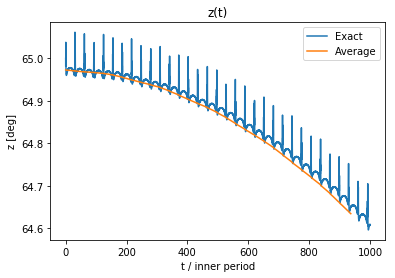

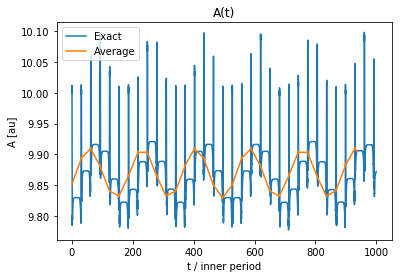

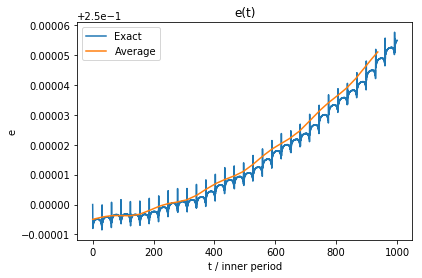

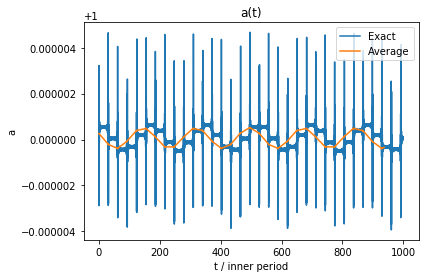

In [86]:
N = int(2*pointsperorbit*Pratio)
zfcn1=(ifcn1+i3fcn1)*180/np.pi
aved_z = np.convolve(zfcn1,np.ones(N)/N,mode='valid')
aved_A = np.convolve(Afcn1,np.ones(N)/N,mode='valid')
aved_e = np.convolve(efcn1,np.ones(N)/N,mode='valid')
aved_a = np.convolve(afcn1,np.ones(N)/N,mode='valid')

plt.plot(np.array(tlist)/innerP,zfcn1,label="Exact")
plt.plot(tlist[:len(aved_z)]/innerP,aved_z,label="Average")
plt.title("z(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('z [deg]')
plt.show()

plt.plot(np.array(tlist)/innerP,Afcn1,label="Exact")
plt.plot(tlist[:len(aved_A)]/innerP,aved_A,label="Average")
plt.title("A(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('A [au]')
plt.show()

plt.plot(np.array(tlist)/innerP,efcn1,label="Exact")
plt.plot(tlist[:len(aved_e)]/innerP,aved_e,label="Average")
plt.title("e(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('e')
plt.show()

plt.plot(np.array(tlist)/innerP,afcn1,label="Exact")
plt.plot(tlist[:len(aved_a)]/innerP,aved_a,label="Average")
plt.title("a(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('a')
plt.show()

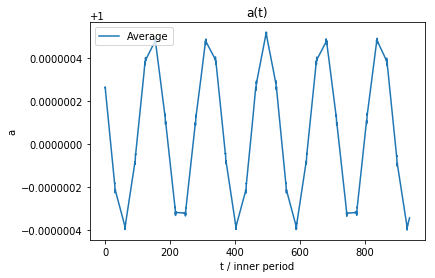

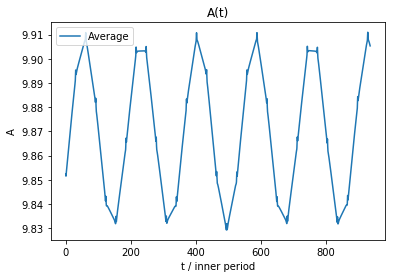

In [87]:
plt.plot(tlist[:len(aved_a)]/innerP,aved_a,label="Average")
plt.title("a(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('a')
plt.show()

plt.plot(tlist[:len(aved_a)]/innerP,aved_A,label="Average")
plt.title("A(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('A')
plt.show()

In [88]:
Afcn1.astype('float32').tofile('npA.dat')
afcn1.astype('float32').tofile('npaa.dat')
efcn1.astype('float32').tofile('npe.dat')
zfcn1.astype('float32').tofile('npz.dat')
tlistmat=tlist/innerP
tlistmat.astype('float32').tofile('npt.dat')


aved_A.astype('float32').tofile('npavA.dat')
aved_a.astype('float32').tofile('npavaa.dat')
aved_e.astype('float32').tofile('npave.dat')
aved_z.astype('float32').tofile('npavz.dat')
avtlistmat=tlist[:len(aved_a)]/innerP
avtlistmat.astype('float32').tofile('npavt.dat')